In [1]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv("Weather Data.csv")

In [5]:
data.isna().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [9]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [13]:
data.Weather=data.Weather.apply(lambda x:'Cloudy'   if 'Cloudy' in x else x)


In [15]:
data.Weather=data.Weather.apply(lambda x:'Clear' if 'Clear' in x else x)

In [17]:
data.Weather=data.Weather.apply(lambda x:'Snow' if 'Snow' in x else x)

In [19]:
data.Weather=data.Weather.apply(lambda x:'Rain' if 'Rain' in x else x)

In [21]:
data.Weather=data.Weather.apply(lambda x:'Fog' if 'Fog' in x else x)

In [23]:
data.Weather=data.Weather.apply(lambda x: 'other' if x in['Drizzle','Haze','Freezing Drizzle','Freezing Drizzle,Haze','Thunderstorms']else x)

In [25]:
data.Weather.value_counts()

Weather
Cloudy    3797
Clear     3432
Rain       662
Snow       583
Fog        241
other       69
Name: count, dtype: int64

In [27]:
X=data.drop(['Date/Time','Weather'],axis=1)
y=data.Weather

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()           # create encoder object
y = le.fit_transform(data['Weather'])  # convert text to numbers

In [30]:
y

array([2, 2, 2, ..., 4, 4, 4])

In [39]:
print(le.classes_)

['Clear' 'Cloudy' 'Fog' 'Rain' 'Snow' 'other']


In [41]:
#split data into trainning and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)

Training shape: (7027, 6)
Testing shape: (1757, 6)


In [53]:
# from sklearn.linear_model import LinearRegression
# modelLR=LinearRegression()
# modelLR.fit(X_train,y_train)

In [55]:
# y_test_pred=modelLR.predict(X_test)

In [57]:
# from sklearn.metrics import r2_score
# r2_score(y_test,y_test_pred)
# 0.4107195349501328  this alogrithm does not give good result

In [59]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(max_depth=5)
dc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [61]:
y_tree_train=dc.predict(X_train)

In [63]:
y_tree_test=dc.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_tree_test)

0.6055776892430279

In [67]:

accuracy_score(y_train,y_tree_train)

0.6272947203643091

In [69]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [71]:
cm = confusion_matrix(y_test,y_tree_test)

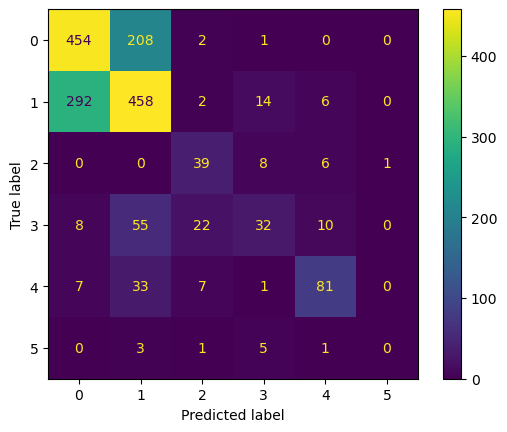

In [73]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dc.classes_)
disp.plot()

In [75]:
train_acc = []
test_acc = []
depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, None]

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

# Display results
results = pd.DataFrame({
    'Max Depth': [str(d) for d in depths],
    'Train Accuracy': train_acc,
    'Test Accuracy': test_acc
})
results

,Max Depth,Train Accuracy,Test Accuracy
0,1,0.461221,0.471827
1,2,0.542764,0.525327
2,3,0.588018,0.579966
3,4,0.599545,0.589641
4,5,0.627295,0.605578
5,6,0.646649,0.626067
6,7,0.668991,0.638019
7,8,0.689056,0.642003
8,9,0.720791,0.631190
9,None,1.000000,0.626636


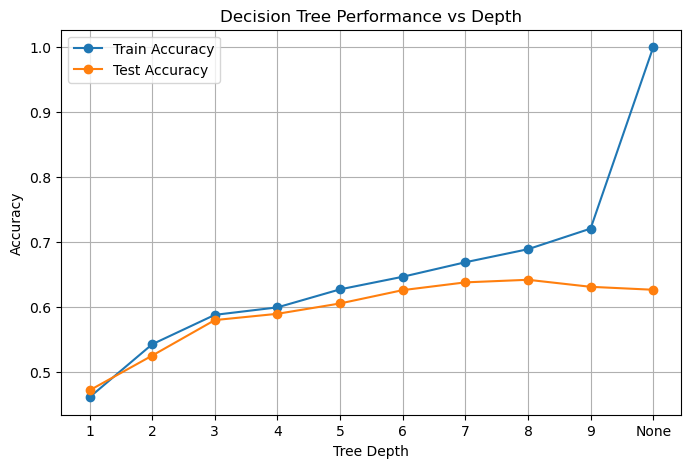

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(results['Max Depth'], results['Train Accuracy'], label='Train Accuracy', marker='o')
plt.plot(results['Max Depth'], results['Test Accuracy'], label='Test Accuracy', marker='o')
plt.title('Decision Tree Performance vs Depth')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


#  Analysis & Conclusion

In [ ]:
From the results, we observe that a depth of 4 or 5 provides the best balance between training and testing accuracy.
When the tree becomes too deep (e.g., depth=None), it overfits the training data, resulting in lower generalization on unseen data.